#  Data Instantiation

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=3)
scale = StandardScaler()
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['group'] = wine.target

X = df[['alcohol', 'total_phenols']]

# Preprocessing

In [2]:
scale.fit(X)

StandardScaler()

In [3]:
scale.mean_

array([13.00061798,  2.29511236])

In [4]:
scale.scale_

array([0.80954291, 0.62409056])

In [5]:
X_scaled = scale.transform(X)

In [6]:
X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([1., 1.])

# modeling

## Fit

In [7]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

## Prediction

In [8]:
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 0 2 0 2 1 0 1 0
 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [9]:
kmeans.cluster_centers_

array([[ 0.92017418,  0.87087204],
       [ 0.05253603, -1.14020926],
       [-1.06183503,  0.08414606]])

In [10]:
X_new = np.array([[13, 2.5]])

X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [11]:
kmeans.predict(X_new_scaled)

array([0])

# modeling with all features

In [12]:
X = df

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

## Elbow method visualization

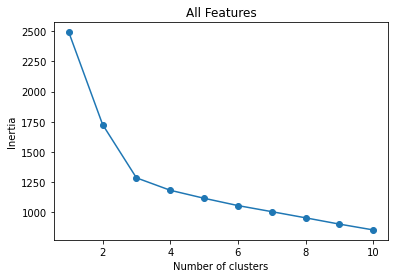

In [13]:
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(np.arange(1,11), inertia, marker='o')
plt.xlabel('Number of clusters'); plt.ylabel('Inertia')
plt.title('All Features')
plt.show()

In [14]:
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Dataframe Anaysis

In [15]:
df.shape

(178, 14)

In [16]:
df.info

<bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  no

In [17]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'group'],
      dtype='object')

In [18]:
df.iloc[:,:3].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


# Optimal K: The Elbow method

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans.inertia_

1727.2286609320035

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.inertia_

1285.6677396078073

[2491.9999999999995, -764.771339067996, -441.66640219179976, -102.90474228898938, -60.671812422559924, -65.67635222323133, -59.34592250770015, -46.368435860033514, -49.859294765775644, -27.53919821115187]


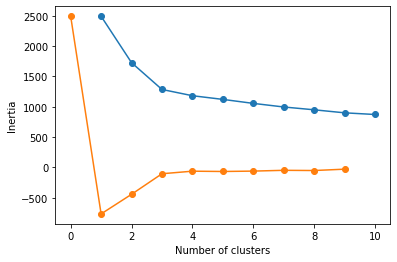

In [21]:
inertia = []
differ = []
pre_inertia = 0
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    differ.append(km.inertia_-pre_inertia)
    pre_inertia=km.inertia_
print(differ)

plt.plot(np.arange(1,11), inertia, differ, marker='o') # erase differ for no orange line.
plt.xlabel('Number of clusters'); plt.ylabel('Inertia')
plt.show()

# Euclidean Distance Example

In [22]:
x1 = np.array([0, 1])
x2 = np.array([2, 0])
print(np.sqrt(((x1-x2)**2).sum()))
print(np.sqrt(5))

2.23606797749979
2.23606797749979


# Dataframe Visualizations

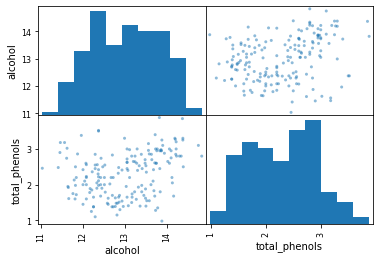

In [23]:
scatter_matrix(df.iloc[:,[0,5]])
plt.show()

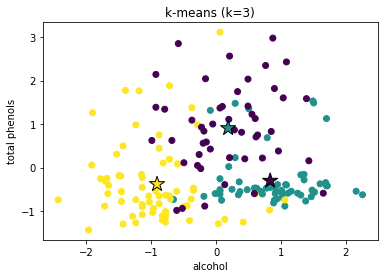

In [24]:
plt.scatter(X_scaled[:, 0],
X_scaled[:, 1],
c= y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='*',
    s = 250,
    c = [0,1,2],
    edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()